# Question 2: Does distance from the city have an affect on House Price?

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [82]:
df = pd.read_csv('datawithnewcols.csv',index_col = 0)

In [83]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
0,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7639,69,29,1,1,0,12.613856,15.150174,12.613856,30.859494
1,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,8062,87,87,0,0,1,16.333282,14.375822,14.375822,33.112379
2,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,5000,55,55,1,1,0,10.617501,17.522706,10.617501,10.988905
3,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,7503,33,33,0,0,1,21.759524,11.683886,11.683886,27.230991
4,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,101930,19,19,1,1,0,25.295727,15.508940,15.508940,32.449837


In [84]:
df2 = df.loc[df['price']>1250000]

In [85]:
df2.bathrooms.value_counts()

3.50    133
3.25    119
2.50    103
3.00     55
4.00     53
2.25     52
3.75     49
2.75     47
4.50     42
4.25     37
1.75     20
4.75     17
2.00     14
5.00     10
5.50      8
5.25      7
1.50      7
6.00      5
5.75      2
8.00      2
6.25      2
1.25      1
6.75      1
7.75      1
6.50      1
Name: bathrooms, dtype: int64

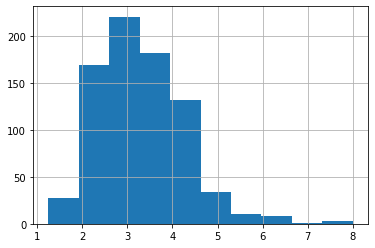

In [86]:
df2.bathrooms.hist()

In [87]:
df2.bedrooms.value_counts()

4    393
5    196
3    143
6     30
2     15
7      5
8      4
9      2
Name: bedrooms, dtype: int64

In [88]:
df2.sqft_living.value_counts()

4010    7
4410    7
4360    7
3490    7
3440    6
       ..
3590    1
4610    1
2560    1
4600    1
5120    1
Name: sqft_living, Length: 384, dtype: int64

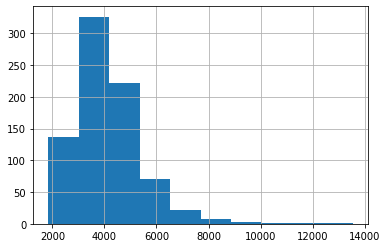

In [89]:
df2.sqft_living.hist()

In [90]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]

check_col = ['price','distance_from_a_city']

all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [91]:
df.drop(all_indices, axis=0,inplace = True)

In [92]:
df.reset_index(drop=True,inplace = True)

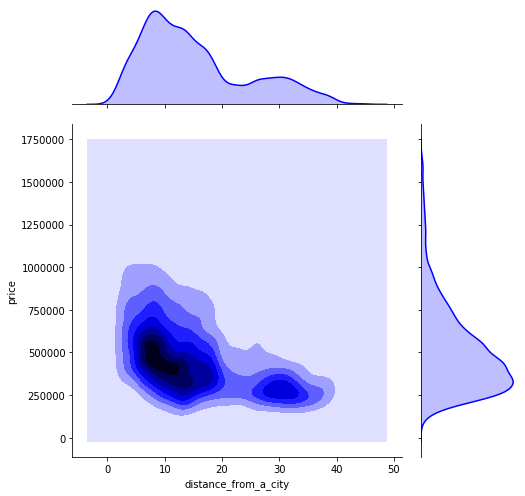

In [93]:
sns.jointplot(x='distance_from_a_city',y='price',data=df, kind = 'kde', height = 7, 
              color = 'b', ratio = 3)


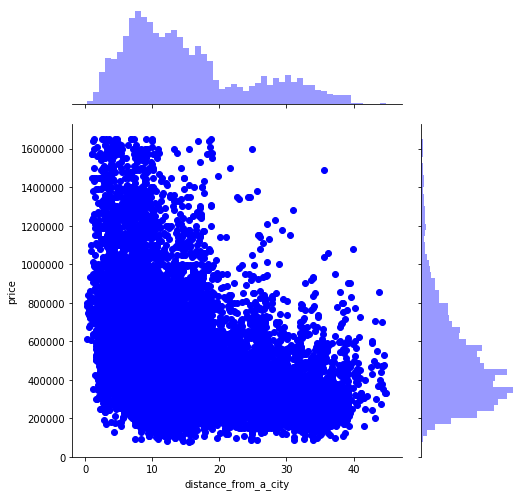

In [94]:
sns.jointplot(x='distance_from_a_city',y='price',data=df, kind = 'scatter', height = 7, 
              color = 'b', ratio = 3)


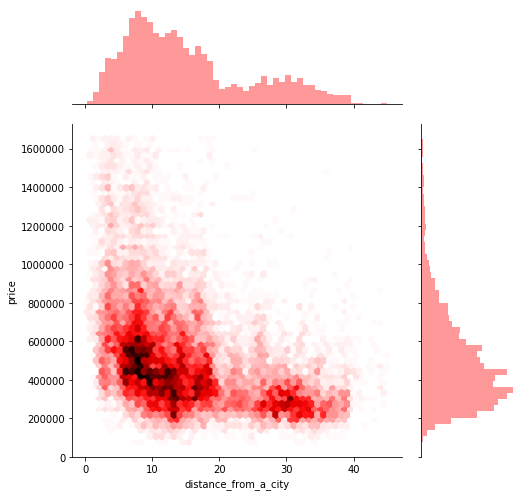

In [95]:
sns.jointplot(x='distance_from_a_city',y='price',data=df, kind = 'hex', height = 7, 
              color = 'r', ratio = 3)


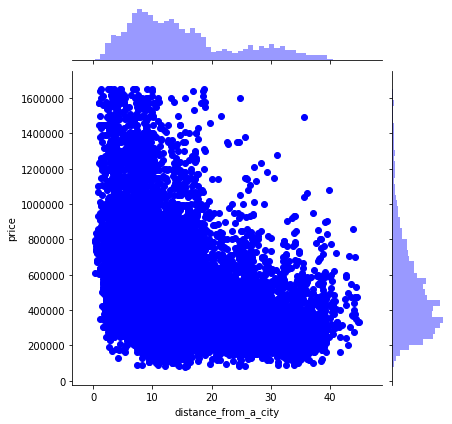

In [96]:
sns.jointplot(x='distance_from_a_city',y='price',data=df, color='b').plot_joint(sns.kdeplot, zorder=0, n_levels=6)

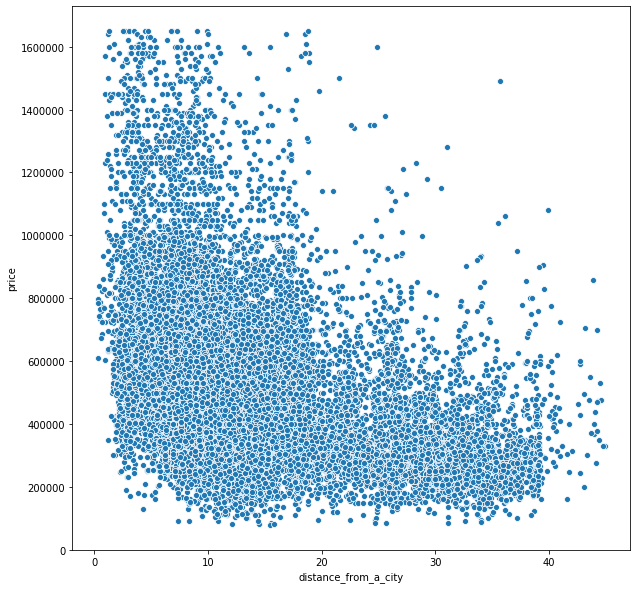

In [97]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(10,10))
ax = sns.scatterplot(y='price',x='distance_from_a_city',data=df)

# Perform a Single Variable Regression using distance from a city 

In [98]:
X1 = df['distance_from_a_city']
y1 = df['price']
X1 = sm.add_constant(X1)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [99]:
model = sm.OLS(y1,X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     4392.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:48:08   Log-Likelihood:            -2.5773e+05
No. Observations:               18690   AIC:                         5.155e+05
Df Residuals:                   18688   BIC:                         5.155e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  6.97e+05   3299.989    211.211      0.000    6.91e+05    7.03e+05
distance_from_a_city -1.226e+04    185.061    -66.271      0.000   -1.26e+04   -1.19e+04
==============================================================================
Omnibus:                     4602.137   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11398.315
Skew:                           1.357   Prob(JB):                         0.00
Kurtosis:                       5.697   Cond. No.                         34.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

An increase in 1km from the city results in a deacrese in price

# Conclusion

It is clear that the distance of the house from a city affects the house price